In [0]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
root_path = '/content/gdrive/My Drive/'

Mounted at /content/gdrive


In [0]:
#coding=utf8
import csv
import pandas as pd
import folium
from IPython.display import HTML, display
from folium.plugins import HeatMap
import numpy as np

import webbrowser
df=pd.read_csv('/content/gdrive/My Drive/5155pro/new_5.csv',sep=',',encoding = "ISO-8859-1")


# deal with wrong code
floor = []
for i in df['floor']:
    i = i[-2:]
    floor.append(i)

# drop irrelevant columns 
floor = pd.DataFrame(floor)
df['floor'] = floor
df = df.drop(columns = ['id'])
df = df.drop(columns = ['url'])
df = df.drop(columns = ['Cid'])
df = df.drop(columns = ['DOM'])
df = df.drop(columns = ['followers'])
df = df.drop(columns = ['tradeTime'])
df = df.drop(columns = ['totalPrice'])
# last column has wrong datatype
df = df.drop(df.index[len(df)-1])
lng = df['Lng']
lat = df['Lat']
lng = np.array(lng)
lat = np.array(lat)

In [0]:
df.tail()

,Lng,Lat,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
318845,116.546899,39.755236,26491,134.20,3,2,1,2,9,3.0,2009,4,6,0.500,1.0,1.0,0.0,3,36545.0
318846,116.546899,39.755236,20580,170.07,3,2,1,2,5,4.0,2003,1,6,0.333,0.0,1.0,0.0,3,36545.0
318847,116.497474,39.810115,31006,35.09,1,0,1,1,24,1.0,2009,1,6,0.222,1.0,0.0,1.0,3,54282.0
318848,116.497256,39.804081,35138,102.17,2,2,1,2,7,4.0,2000,3,6,0.500,1.0,1.0,0.0,3,46927.0
318849,116.501794,39.799347,40373,178.34,4,2,1,2,5,4.0,2003,4,2,0.500,0.0,1.0,0.0,3,54842.0


In [0]:
df.dtypes

Lng                    float64
Lat                    float64
price                    int64
square                 float64
livingRoom              object
drawingRoom             object
kitchen                  int64
bathRoom                object
floor                   object
buildingType           float64
constructionTime        object
renovationCondition      int64
buildingStructure        int64
ladderRatio            float64
elevator               float64
fiveYearsProperty      float64
subway                 float64
district                 int64
communityAverage       float64
dtype: object

In [0]:
latitude = 39.9042
longitude = 116.4074

# Create map and display it
san_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# Display the map of San Francisco
san_map

In [0]:
limit = 1000
data = df.iloc[0:limit, :]

# Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# Loop through the 200 crimes and add each to the incidents feature group
for lat, lng, in zip(data.Lat, data.Lng):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=7, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=0.4
        )
    )

# Add incidents to map
san_map = folium.Map(location=[latitude, longitude], zoom_start=9)
san_map.add_child(incidents)

In [0]:
from folium.plugins import HeatMap
san_map = folium.Map(location=[latitude, longitude], zoom_start=10)
HeatMap(data=data[['Lat', 'Lng', 'price']].groupby(['Lat', 'Lng']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(san_map)
san_map

Remove the square error


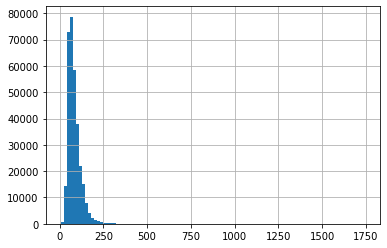

In [0]:
print("Remove the square error")
df["square"].hist(grid=True,bins=100)

[20, 163, 167, 186, 292, 315, 329, 352, 399, 625, 685, 811, 863, 906, 963, 997, 1015, 1020, 1108, 1361, 1408, 1455, 1637, 1683, 2020, 2081, 2108, 2598, 2710, 2957, 2963, 3842, 4345, 4456, 4807, 5071, 5114, 5206, 5338, 6147, 6173, 6637, 6975, 7131, 7274, 7452, 8099, 8167, 8332, 8397, 8526, 8736, 10078, 11046, 11541, 11552, 13161, 13396, 13527, 13574, 14542, 14638, 14667, 14777, 15819, 15903, 16381, 16779, 17071, 17356, 17931, 19753, 20270, 20378, 23183, 23725, 23779, 24561, 24728, 25448, 25723, 25813, 26732, 26939, 27083, 27376, 27426, 27876, 28502, 29470, 29876, 30787, 33001, 33711, 35041, 35472, 35900, 36718, 37113, 37277, 37726, 37880, 37975, 38061, 38584, 39974, 40990, 41200, 41519, 41586, 42577, 44427, 48056, 48486, 49070, 49281, 49443, 49707, 49874, 50061, 50502, 50626, 51031, 51414, 51727, 52366, 52463, 52536, 52741, 53243, 54190, 54736, 56352, 57345, 58013, 58482, 59612, 59613, 59614, 60530, 61121, 61831, 62247, 63778, 65440, 65542, 67685, 67686, 67868, 69148, 69178, 69483, 6989

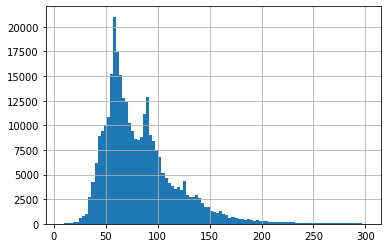

In [0]:
# Remove outlier 
square = np.array(df["square"])
remove_list = []
i = 0
for temp in square:
  i +=1
  if temp>300:
    remove_list.append(i-1)
print(remove_list)
for i in remove_list:
  df = df.drop(i)

df["square"].hist(grid=True,bins=100)

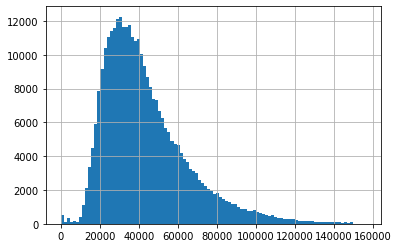

In [0]:
df['price'].hist(grid=True,bins=100)

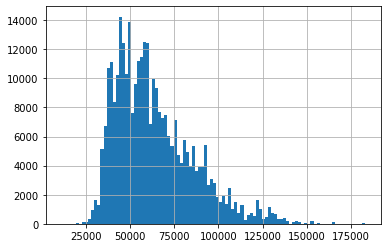

In [0]:
df['communityAverage'].hist(grid=True,bins=100)

In [0]:
def normalize(lists):
    new = []
    max = np.max(lists)
    min = np.min(lists)
    x = 0
    for i in lists:
      
      if i == np.nan:
        print(x)
      i = (i-min)/(max-min)
      new.append(i)
      x = x + 1
    return new


list_price = np.array(df['price'])
list_area = np.array(df['square'])
list_com = np.array(df['communityAverage'])

# df['price'] = normalize(list_price)
df['square'] = normalize(list_area)


In [0]:
df.head()

,Lng,Lat,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,116.475489,40.019520,31680,0.423405,2,1,1,1,26,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,116.453917,39.881534,43436,0.428113,2,2,1,2,22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,116.561978,39.877145,52021,0.651996,3,2,1,3,4,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,116.438010,40.076114,22202,0.433640,3,1,1,1,21,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,116.428392,39.886229,48396,0.252815,2,1,1,1,6,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


In [0]:
# fill the nan in communityAverage and normalize it
from sklearn.preprocessing import Imputer
mean_imputer = Imputer(missing_values=np.nan, strategy="mean", axis=0)
df[['communityAverage']] = mean_imputer.fit_transform(df[['communityAverage']])
com_list = np.array(df['communityAverage'])
df['communityAverage'] = normalize(com_list)


In [0]:
df.head()

,Lng,Lat,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,116.475489,40.019520,31680,0.423405,2,1,1,1,26,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,0.262240
1,116.453917,39.881534,43436,0.428113,2,2,1,2,22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,0.352324
2,116.561978,39.877145,52021,0.651996,3,2,1,3,4,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,0.216606
3,116.438010,40.076114,22202,0.433640,3,1,1,1,21,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,0.234474
4,116.428392,39.886229,48396,0.252815,2,1,1,1,6,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,0.300362


In [0]:
mode_imputer = Imputer(missing_values=np.nan, strategy="most_frequent", axis=0)
ap=df.groupby(by=['drawingRoom'])
ap.size()
# , 'drawingRoom', 'kitchen','bathRoom'
# for row in df['drawingRoom'].itertuples(index=True, name='Pandas'):

drawingRoom
0         11296
1        109768
2         33262
3           419
4            28
5             3
0          8383
1        115864
2         38969
3           388
4            10
µÍ 15         1
µÍ 16         1
µÍ 6          7
µ× 11         1
µ× 20         1
µ× 28         1
¶¥ 6          2
¸ß 12         1
¸ß 14         2
¸ß 6          1
ÖÐ 14         2
ÖÐ 15         1
ÖÐ 16         3
ÖÐ 22         1
ÖÐ 24         1
ÖÐ 6          6
dtype: int64

In [0]:
index_list2 = []
for row in df.itertuples(index=True, name='Pandas'):
  if row.drawingRoom == 'µÍ 15':
    index_list2.append(row.Index)
  if row.drawingRoom == 'µÍ 16':
    index_list2.append(row.Index)
  if row.drawingRoom == 'µÍ 6':
    index_list2.append(row.Index)  
  if row.drawingRoom == 'µ× 11':
    index_list2.append(row.Index)
  if row.drawingRoom == 'µ× 20':
    index_list2.append(row.Index)
  if row.drawingRoom == 'µ× 28':
    index_list2.append(row.Index)
  if row.drawingRoom == '¶¥ 6':
    index_list2.append(row.Index)
  if row.drawingRoom == '¸ß 12':
    index_list2.append(row.Index) 
  if row.drawingRoom == '¸ß 14':
    index_list2.append(row.Index) 
  if row.drawingRoom == '¸ß 6':
    index_list2.append(row.Index) 
  if row.drawingRoom == 'ÖÐ 14':
    index_list2.append(row.Index) 
  if row.drawingRoom == 'ÖÐ 15':
    index_list2.append(row.Index) 
  if row.drawingRoom == 'ÖÐ 16':
    index_list2.append(row.Index) 
  if row.drawingRoom == 'ÖÐ 22':
    index_list2.append(row.Index)  
  if row.drawingRoom == 'ÖÐ 24':
    index_list2.append(row.Index)
  if row.drawingRoom == 'ÖÐ 6':
    index_list2.append(row.Index)
print(index_list2)
for i in index_list2:
  df = df.drop(i)

[92235, 92251, 92267, 92270, 92297, 92299, 92300, 92304, 92340, 92349, 92356, 92398, 92409, 92414, 92467, 92520, 92610, 92660, 92814, 92845, 92899, 113275, 141376, 208214, 220567, 220569, 220570, 220603, 224349, 243731, 244054, 245394]


In [0]:
ap=df.groupby(by=['drawingRoom'])
ap.size()

drawingRoom
0     11296
1    109768
2     33262
3       419
4        28
5         3
0      8383
1    115864
2     38969
3       388
4        10
dtype: int64

In [0]:
df['drawingRoom'] = df['drawingRoom'].astype(int)
ap=df.groupby(by=['drawingRoom'])
ap.size()

drawingRoom
0     19679
1    225632
2     72231
3       807
4        38
5         3
dtype: int64

In [0]:
df['livingRoom'] = df['livingRoom'].astype(int)
al=df.groupby(by=['livingRoom'])
al.size()

livingRoom
0        28
1     82376
2    160585
3     67573
4      6648
5       969
6       176
7        29
8         3
9         3
dtype: int64

In [0]:
ak=df.groupby(by=['kitchen'])
ak.size()

kitchen
0      2677
1    314907
2       785
3        21
dtype: int64

In [0]:
df['bathRoom'] = df['bathRoom'].astype(int)
ar=df.groupby(by=['bathRoom'])
ar.size()

bathRoom
0       913
1    261471
2     52548
3      3067
4       362
5        23
6         5
7         1
dtype: int64

In [0]:
df['floor'] = df['floor'].astype(int)
arf=df.groupby(by=['floor'])
arf.size()

floor
1        325
2        142
3       1006
4       3012
5      13456
6     107760
7       9951
8       2339
9       7102
10      5700
11      9640
12      9092
13      4295
14      8818
15      7258
16     15996
17      5223
18     23003
19      4714
20     10019
21      9016
22      9222
23      3529
24     13588
25      6395
26      6880
27      4850
28      7445
29      1827
30      2456
31       669
32      2469
33       570
34       555
35         3
36        12
37        16
42        34
57         2
63         1
dtype: int64

In [0]:
# df['buildingType'] = df['buildingType'].astype(int)
arft=df.groupby(by=['buildingType'])
arft.size()

buildingType
1.0     84451
2.0       137
3.0     59673
4.0    172256
dtype: int64

In [0]:
arftime=df.groupby(by=['constructionTime'])
arftime.size()
index_list3 = []
for row in df.itertuples(index=True, name='Pandas'):
  if row.constructionTime == 'Î´Öª':
    index_list3.append(row.Index)

for i in index_list3:
  df['constructionTime'] = df['constructionTime'].replace('Î´Öª', np.nan)

In [0]:
most_imputer = Imputer(missing_values=np.nan, strategy="most_frequent", axis=0)
df[['constructionTime']] = most_imputer.fit_transform(df[['constructionTime']])

In [0]:
arftime=df.groupby(by=['constructionTime'])
arftime.size()

constructionTime
1906.0       1
1914.0       1
1933.0       1
1934.0       2
1944.0       2
          ... 
2012.0    5050
2013.0    2322
2014.0    2122
2015.0     476
2016.0      85
Length: 71, dtype: int64

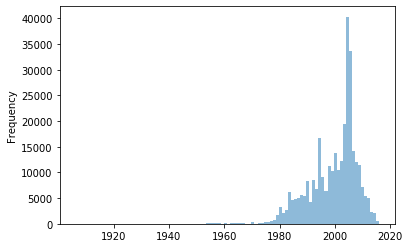

In [0]:
df['constructionTime'] = df['constructionTime'].astype(int)
df['constructionTime'].plot.hist(bins=100, alpha=0.5)

In [0]:
  df['renovationCondition'] = df['renovationCondition'].astype(int)
  arftime_con = df.groupby(by=['renovationCondition'])
  arftime_con.size()

renovationCondition
1    118603
2      5335
3     77216
4    117236
dtype: int64

In [0]:
  df['buildingStructure'] = df['buildingStructure'].astype(int)
  df[['buildingStructure']] = mean_imputer.fit_transform(df[['buildingStructure']])
  arftime_stru = df.groupby(by=['buildingStructure'])
  arftime_stru.size()

buildingStructure
1.0       173
2.0    115743
3.0       253
4.0     14312
5.0       175
6.0    187734
dtype: int64

In [0]:
  df['district'] = df['district'].astype(int)
  arftime_dis = df.groupby(by=['district'])
  arftime_dis.size()

district
1      17068
2      29328
3       2527
4      15290
5       2954
6      38550
7     107063
8      38130
9      11371
10     31276
11     13971
12      1683
13      9179
dtype: int64

In [0]:
df['buildingStructure'] = normalize(df['buildingStructure'])

In [0]:
df['renovationCondition'] = normalize(df['renovationCondition'])

In [0]:
df['constructionTime'] = normalize(df['constructionTime'])

In [0]:
df['floor'] = normalize(df['floor'])

In [0]:
district = df.groupby(by=['district'])
district.size()

district
1      17068
2      29328
3       2527
4      15290
5       2954
6      38550
7     107063
8      38130
9      11371
10     31276
11     13971
12      1683
13      9179
dtype: int64

In [0]:
df.head()

,Lng,Lat,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,116.475489,40.019520,31680,0.423405,2,1,1,1,0.403226,1.0,0.900000,0.666667,1.0,0.217,1.0,0.0,1.0,7,0.262240
1,116.453917,39.881534,43436,0.428113,2,2,1,2,0.338710,1.0,0.890909,1.000000,1.0,0.667,1.0,1.0,0.0,7,0.352324
2,116.561978,39.877145,52021,0.651996,3,2,1,3,0.048387,4.0,0.900000,0.666667,1.0,0.500,1.0,0.0,0.0,7,0.216606
3,116.438010,40.076114,22202,0.433640,3,1,1,1,0.322581,1.0,0.927273,0.000000,1.0,0.273,1.0,0.0,0.0,6,0.234474
4,116.428392,39.886229,48396,0.252815,2,1,1,1,0.080645,4.0,0.490909,0.333333,0.2,0.333,0.0,1.0,1.0,1,0.300362


In [0]:
df.isna().any()

Lng                    False
Lat                    False
price                  False
square                 False
livingRoom             False
drawingRoom            False
kitchen                False
bathRoom               False
floor                  False
buildingType            True
constructionTime       False
renovationCondition    False
buildingStructure      False
ladderRatio            False
elevator               False
fiveYearsProperty      False
subway                 False
district               False
communityAverage       False
dtype: bool

In [0]:
df['district'] = normalize(df['district'])
df.head()

,Lng,Lat,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,116.475489,40.019520,31680,0.423405,2,1,1,1,0.403226,1.0,0.900000,0.666667,1.0,0.217,1.0,0.0,1.0,0.500000,0.262240
1,116.453917,39.881534,43436,0.428113,2,2,1,2,0.338710,1.0,0.890909,1.000000,1.0,0.667,1.0,1.0,0.0,0.500000,0.352324
2,116.561978,39.877145,52021,0.651996,3,2,1,3,0.048387,4.0,0.900000,0.666667,1.0,0.500,1.0,0.0,0.0,0.500000,0.216606
3,116.438010,40.076114,22202,0.433640,3,1,1,1,0.322581,1.0,0.927273,0.000000,1.0,0.273,1.0,0.0,0.0,0.416667,0.234474
4,116.428392,39.886229,48396,0.252815,2,1,1,1,0.080645,4.0,0.490909,0.333333,0.2,0.333,0.0,1.0,1.0,0.000000,0.300362


In [0]:
bt = df.groupby(by=['buildingType'])
bt.size()

buildingType
1.0     84451
2.0       137
3.0     59673
4.0    172256
dtype: int64

In [0]:
# make up with most frequent
index_list4 = []
for row in df.itertuples(index=True, name='Pandas'):
  if row.buildingType == np.nan:
    index_list4.append(row.Index)
df['buildingType'] = normalize(df['buildingType'])
df.head()

,Lng,Lat,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,116.475489,40.019520,31680,0.423405,2,1,1,1,0.403226,0.0,0.900000,0.666667,1.0,0.217,1.0,0.0,1.0,0.500000,0.262240
1,116.453917,39.881534,43436,0.428113,2,2,1,2,0.338710,0.0,0.890909,1.000000,1.0,0.667,1.0,1.0,0.0,0.500000,0.352324
2,116.561978,39.877145,52021,0.651996,3,2,1,3,0.048387,1.0,0.900000,0.666667,1.0,0.500,1.0,0.0,0.0,0.500000,0.216606
3,116.438010,40.076114,22202,0.433640,3,1,1,1,0.322581,0.0,0.927273,0.000000,1.0,0.273,1.0,0.0,0.0,0.416667,0.234474
4,116.428392,39.886229,48396,0.252815,2,1,1,1,0.080645,1.0,0.490909,0.333333,0.2,0.333,0.0,1.0,1.0,0.000000,0.300362


In [0]:
df['livingRoom'] = normalize(df['livingRoom'])

In [0]:
df['drawingRoom'] = normalize(df['drawingRoom'])

In [0]:
df['kitchen'] = normalize(df['kitchen'])

In [0]:
df['bathRoom'] = normalize(df['bathRoom'])

In [0]:
df.head()

,Lng,Lat,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,116.475489,40.019520,31680,0.423405,0.222222,0.2,0.333333,0.142857,0.403226,0.0,0.900000,0.666667,1.0,0.217,1.0,0.0,1.0,0.500000,0.262240
1,116.453917,39.881534,43436,0.428113,0.222222,0.4,0.333333,0.285714,0.338710,0.0,0.890909,1.000000,1.0,0.667,1.0,1.0,0.0,0.500000,0.352324
2,116.561978,39.877145,52021,0.651996,0.333333,0.4,0.333333,0.428571,0.048387,1.0,0.900000,0.666667,1.0,0.500,1.0,0.0,0.0,0.500000,0.216606
3,116.438010,40.076114,22202,0.433640,0.333333,0.2,0.333333,0.142857,0.322581,0.0,0.927273,0.000000,1.0,0.273,1.0,0.0,0.0,0.416667,0.234474
4,116.428392,39.886229,48396,0.252815,0.222222,0.2,0.333333,0.142857,0.080645,1.0,0.490909,0.333333,0.2,0.333,0.0,1.0,1.0,0.000000,0.300362


In [0]:
from math import *
def calcDistance(Lat_A, Lng_A, Lat_B, Lng_B):
    ra = 6378.140  
    rb = 6356.755  
    flatten = (ra - rb) / ra  
    rad_lat_A = radians(Lat_A)
    rad_lng_A = radians(Lng_A)
    rad_lat_B = radians(Lat_B)
    rad_lng_B = radians(Lng_B)
    pA = atan(rb / ra * tan(rad_lat_A))
    pB = atan(rb / ra * tan(rad_lat_B))
    xx = acos(sin(pA) * sin(pB) + cos(pA) * cos(pB) * cos(rad_lng_A - rad_lng_B))
    c1 = (sin(xx) - xx) * (sin(pA) + sin(pB)) ** 2 / cos(xx / 2) ** 2
    c2 = (sin(xx) + xx) * (sin(pA) - sin(pB)) ** 2 / sin(xx / 2) ** 2
    dr = flatten / 8 * (c1 - c2)
    distance = ra * (xx + dr)
    return distance

Lat_tianan = 39.9087
Lon_tianan = 116.3975

dis_list = []
for row in df.itertuples(index=True, name='Pandas'):
  lat = row.Lat
  lng = row.Lng
  distance = calcDistance(lat, lng, Lat_tianan, Lon_tianan)
  dis_list.append(distance)

df.insert(0,'distance',dis_list)
df['distance'] = normalize(df['distance'])
df.head()

,distance,Lng,Lat,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,0.313311,116.475489,40.019520,31680,0.423405,0.222222,0.2,0.333333,0.142857,0.403226,0.0,0.900000,0.666667,1.0,0.217,1.0,0.0,1.0,0.500000,0.262240
1,0.126492,116.453917,39.881534,43436,0.428113,0.222222,0.4,0.333333,0.285714,0.338710,0.0,0.890909,1.000000,1.0,0.667,1.0,1.0,0.0,0.500000,0.352324
2,0.324652,116.561978,39.877145,52021,0.651996,0.333333,0.4,0.333333,0.428571,0.048387,1.0,0.900000,0.666667,1.0,0.500,1.0,0.0,0.0,0.500000,0.216606
3,0.423899,116.438010,40.076114,22202,0.433640,0.333333,0.2,0.333333,0.142857,0.322581,0.0,0.927273,0.000000,1.0,0.273,1.0,0.0,0.0,0.416667,0.234474
4,0.080221,116.428392,39.886229,48396,0.252815,0.222222,0.2,0.333333,0.142857,0.080645,1.0,0.490909,0.333333,0.2,0.333,0.0,1.0,1.0,0.000000,0.300362


In [0]:
first_cycle_lat = 39.9469 
first_cycle_lon = 116.4146

second_cycle_lat = 39.9604
second_cycle_lon = 116.3124

third_cycle_lat = 39.9832
third_cycle_lon = 116.3155

forth_cycle_lat = 40.0081
forth_cycle_lon = 116.2982

fifth_cycle_lat = 40.0799
fifth_cycle_lon = 116.6031

first_cycle = calcDistance(first_cycle_lat, first_cycle_lon, Lat_tianan, Lon_tianan)
second_cycle = calcDistance(second_cycle_lat, second_cycle_lon, Lat_tianan, Lon_tianan)
third_cycle = calcDistance(third_cycle_lat, third_cycle_lon, Lat_tianan, Lon_tianan)
forth_cycle = calcDistance(forth_cycle_lat, forth_cycle_lon, Lat_tianan, Lon_tianan)
fifth_cycle = calcDistance(fifth_cycle_lat, fifth_cycle_lon, Lat_tianan, Lon_tianan)

cycle_list = []
for i in dis_list:
  if i < first_cycle:
    cycle_list.append(1)
  if i < second_cycle and i > first_cycle:
    cycle_list.append(2)
  if i < third_cycle and i > second_cycle:
    cycle_list.append(3)
  if i < forth_cycle and i > third_cycle:
    cycle_list.append(4)
  if i < fifth_cycle and i > forth_cycle:
    cycle_list.append(5)
  if i > fifth_cycle:
    cycle_list.append(6)

df.insert(0,'Cycle',cycle_list)
df.head()           

,Cycle,distance,Lng,Lat,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,5,0.313311,116.475489,40.019520,31680,0.423405,0.222222,0.2,0.333333,0.142857,0.403226,0.0,0.900000,0.666667,1.0,0.217,1.0,0.0,1.0,0.500000,0.262240
1,2,0.126492,116.453917,39.881534,43436,0.428113,0.222222,0.4,0.333333,0.285714,0.338710,0.0,0.890909,1.000000,1.0,0.667,1.0,1.0,0.0,0.500000,0.352324
2,5,0.324652,116.561978,39.877145,52021,0.651996,0.333333,0.4,0.333333,0.428571,0.048387,1.0,0.900000,0.666667,1.0,0.500,1.0,0.0,0.0,0.500000,0.216606
3,5,0.423899,116.438010,40.076114,22202,0.433640,0.333333,0.2,0.333333,0.142857,0.322581,0.0,0.927273,0.000000,1.0,0.273,1.0,0.0,0.0,0.416667,0.234474
4,1,0.080221,116.428392,39.886229,48396,0.252815,0.222222,0.2,0.333333,0.142857,0.080645,1.0,0.490909,0.333333,0.2,0.333,0.0,1.0,1.0,0.000000,0.300362


In [0]:
Cy = df.groupby(by=['Cycle'])
Cy.size()

Cycle
1     22740
2     97140
3     32040
4     40028
5    112332
6     14110
dtype: int64

In [0]:
def house_type(living_room, drawing_room, kitchen, batchroom,floor, square):
    a = 3
    b = 2
    score = np.square(living_room - 0.2) + np.square(drawing_room - 0.2) + np.square(kitchen - 0.3) + np.square(batchroom - 0.16) + np.square(floor - 0.07) + np.square(square - 0.16)
    score1 = np.sqrt(score/5)
    return score1

score_list = []
for row in df.itertuples(index=True, name='Pandas'):
  living_room1 = row.livingRoom
  drawing_room1 = row.drawingRoom
  kitchen1 = row.kitchen
  batchroom = row.bathRoom
  floor1 = row.floor
  square1 =row.square
  score = house_type(living_room1, drawing_room1, kitchen1, batchroom,floor1, square1)
  score_list.append(score)

df.insert(0,'typescore',score_list)
df.head()

,typescore,Cycle,distance,Lng,Lat,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,0.190956,5,0.313311,116.475489,40.019520,31680,0.423405,0.222222,0.2,0.333333,0.142857,0.403226,0.0,0.900000,0.666667,1.0,0.217,1.0,0.0,1.0,0.500000,0.262240
1,0.200748,2,0.126492,116.453917,39.881534,43436,0.428113,0.222222,0.4,0.333333,0.285714,0.338710,0.0,0.890909,1.000000,1.0,0.667,1.0,1.0,0.0,0.500000,0.352324
2,0.273330,5,0.324652,116.561978,39.877145,52021,0.651996,0.333333,0.4,0.333333,0.428571,0.048387,1.0,0.900000,0.666667,1.0,0.500,1.0,0.0,0.0,0.500000,0.216606
3,0.177684,5,0.423899,116.438010,40.076114,22202,0.433640,0.333333,0.2,0.333333,0.142857,0.322581,0.0,0.927273,0.000000,1.0,0.273,1.0,0.0,0.0,0.416667,0.234474
4,0.046101,1,0.080221,116.428392,39.886229,48396,0.252815,0.222222,0.2,0.333333,0.142857,0.080645,1.0,0.490909,0.333333,0.2,0.333,0.0,1.0,1.0,0.000000,0.300362


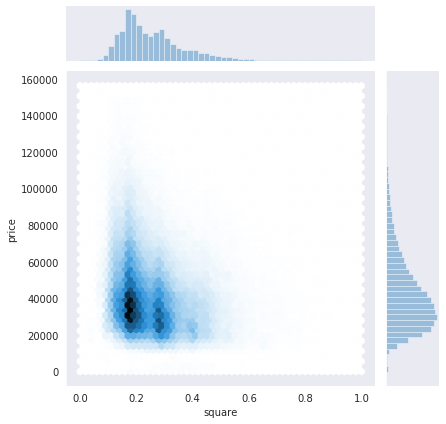

In [0]:
import seaborn as sns
x4 = df['square']
y4 = df['price']
with sns.axes_style("dark"):
    sns.jointplot(x4, y4, kind="hex")

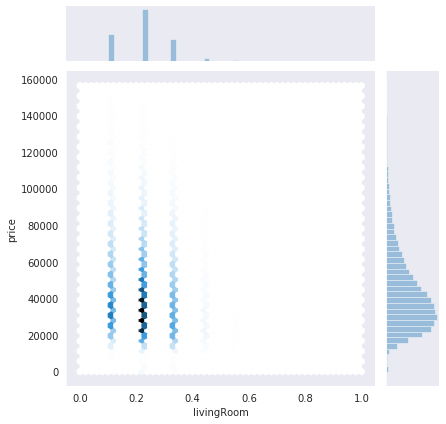

In [0]:
x5 = df['livingRoom']
y5 = df['price']
with sns.axes_style("dark"):
    sns.jointplot(x5, y5, kind="hex")

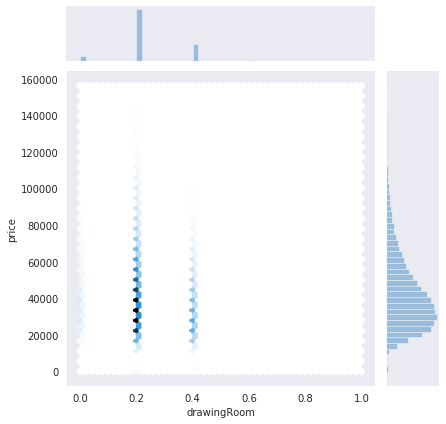

In [0]:
x6 = df['drawingRoom']
y6 = df['price']
with sns.axes_style("dark"):
    sns.jointplot(x6, y6, kind="hex")

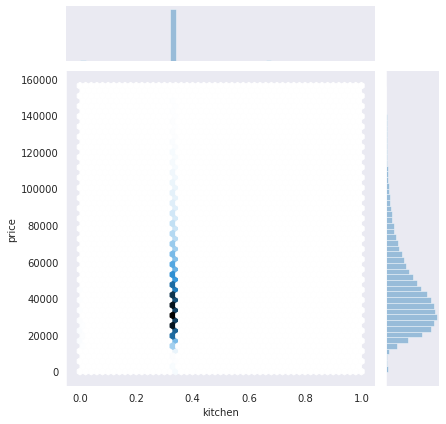

In [0]:
x7 = df['kitchen']
y7 = df['price']
with sns.axes_style("dark"):
    sns.jointplot(x7, y7, kind="hex")

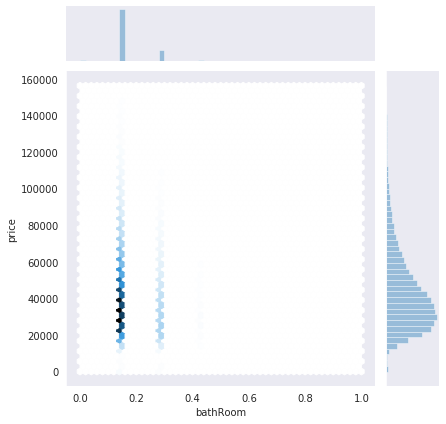

In [0]:
x8 = df['bathRoom']
y8 = df['price']
with sns.axes_style("dark"):
    sns.jointplot(x8, y8, kind="hex")

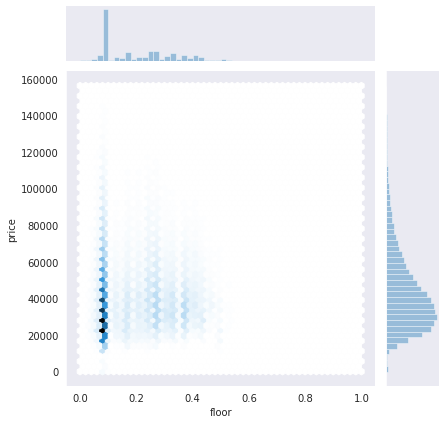

In [0]:
x9 = df['floor']
y9 = df['price']
with sns.axes_style("dark"):
    sns.jointplot(x9, y9, kind="hex")

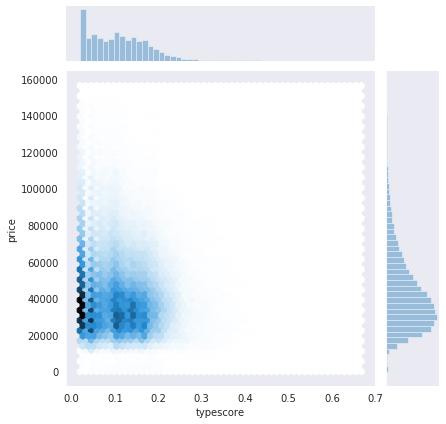

In [0]:
import seaborn as sns
x3 = df['typescore']
y3 = df['price']
with sns.axes_style("dark"):
    sns.jointplot(x3, y3, kind="hex")

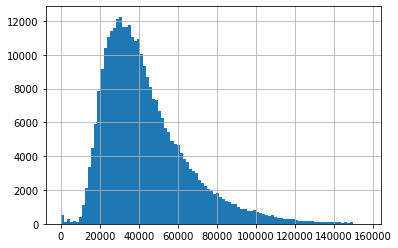

In [0]:
df['price'].hist(grid=True,bins=100)

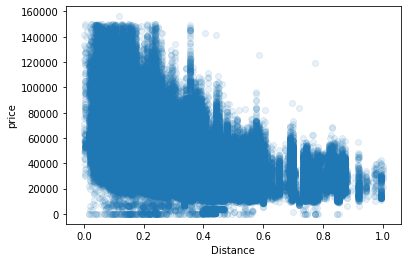

In [0]:
import matplotlib.pyplot as plt 
plt.xlabel('Distance')
plt.ylabel('price')
plt.scatter(df['distance'],df['price'], alpha=0.1)

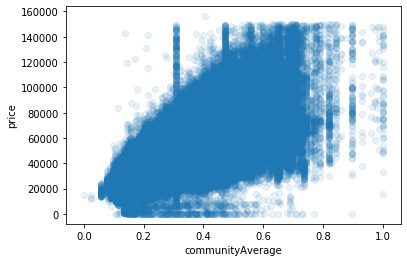

In [0]:
import matplotlib.pyplot as plt 
plt.xlabel('communityAverage')
plt.ylabel('price')
plt.scatter(df['communityAverage'],df['price'], alpha=0.1)

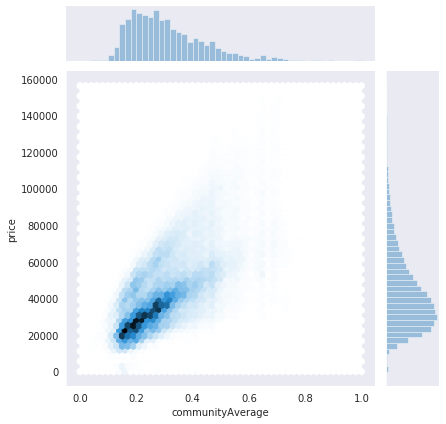

In [0]:
import seaborn as sns
x1 = df['communityAverage']
y1 = df['price']
with sns.axes_style("dark"):
    sns.jointplot(x1, y1, kind="hex")

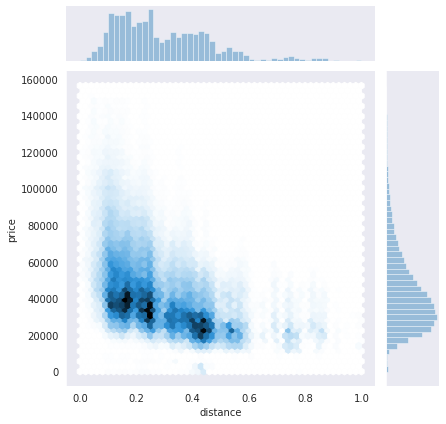

In [0]:
x2 = df['distance']
y2 = df['price']
with sns.axes_style("dark"):
    sns.jointplot(x2, y2, kind="hex")

In [0]:
label_list = []
# 0 means low, 1 means medium, 2 means high
for row in df.itertuples(index=True, name='Pandas'):
  if row.price <= 20000:
    label_list.append('low')
  elif row.price > 20000 and row.price <= 60000:
    label_list.append('medium')
  elif row.price > 60000:
    label_list.append('high')

df.insert(0,'label',label_list)
df.head()

,label,typescore,Cycle,distance,Lng,Lat,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,medium,0.190956,5,0.313311,116.475489,40.019520,31680,0.423405,0.222222,0.2,0.333333,0.142857,0.403226,0.0,0.900000,0.666667,1.0,0.217,1.0,0.0,1.0,0.500000,0.262240
1,medium,0.200748,2,0.126492,116.453917,39.881534,43436,0.428113,0.222222,0.4,0.333333,0.285714,0.338710,0.0,0.890909,1.000000,1.0,0.667,1.0,1.0,0.0,0.500000,0.352324
2,medium,0.273330,5,0.324652,116.561978,39.877145,52021,0.651996,0.333333,0.4,0.333333,0.428571,0.048387,1.0,0.900000,0.666667,1.0,0.500,1.0,0.0,0.0,0.500000,0.216606
3,medium,0.177684,5,0.423899,116.438010,40.076114,22202,0.433640,0.333333,0.2,0.333333,0.142857,0.322581,0.0,0.927273,0.000000,1.0,0.273,1.0,0.0,0.0,0.416667,0.234474
4,medium,0.046101,1,0.080221,116.428392,39.886229,48396,0.252815,0.222222,0.2,0.333333,0.142857,0.080645,1.0,0.490909,0.333333,0.2,0.333,0.0,1.0,1.0,0.000000,0.300362


In [0]:
# remove nan
df[['buildingType']] = mean_imputer.fit_transform(df[['buildingType']])
label = df.groupby(by=['label'])
label.size()

label
high       59428
low        24812
medium    234150
dtype: int64

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Train = df[['distance','typescore', 'buildingType', 'constructionTime','renovationCondition','buildingStructure','ladderRatio','elevator','fiveYearsProperty','subway','district','communityAverage']]
df['label'] = le.fit_transform(df['label'])
Label = df['label']

In [0]:
from sklearn.model_selection import train_test_split
train_x, x_test, train_y, y_test = train_test_split(Train, Label, test_size=0.3, random_state = 42)

In [0]:
!pip install skope-rules

In [0]:
df.isna().any()

label                  False
typescore              False
Cycle                  False
distance               False
Lng                    False
Lat                    False
price                  False
square                 False
livingRoom             False
drawingRoom            False
kitchen                False
bathRoom               False
floor                  False
buildingType           False
constructionTime       False
renovationCondition    False
buildingStructure      False
ladderRatio            False
elevator               False
fiveYearsProperty      False
subway                 False
district               False
communityAverage       False
dtype: bool

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
from skrules import SkopeRules
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support,accuracy_score, precision_score,recall_score
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings("ignore")


label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])


def eval_model(y_true,y_pred,labels):
    P,r,f1,s =precision_recall_fscore_support(y_true,y_pred)
    # Precision，Recall，f1，support
    tot_P = np.average(P,weights =s)
    tot_r = np.average(r,weights =s)
    tot_f1 = np.average(f1,weights =s)
    tot_s = np.sum(s)
    res1 = pd.DataFrame({
        'Label':labels,
        'Precision':P,
        'Reacll':r,
        'F1':f1,
        'Support':s
    })
    res2 = pd.DataFrame({
        'Label':['Total'],
        'Precision':[tot_P],
        'Recall':[tot_r],
        'F1':[tot_f1],
        'Support':[tot_s]
    })
    res2.index=[900]
    res = pd.concat([res1,res2], sort=False)

    conf_mat = pd.DataFrame(confusion_matrix(y_true,y_pred),columns=labels,index=labels)
    return conf_mat,res[['Label','Precision','Recall','F1','Support']]

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

def Boosting(train_x, x_test, train_y, y_test):
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
    clf.fit(train_x, train_y)
    prediction = clf.predict(x_test)
    print("------Boosting---------Evaluate----------------")
    recall = recall_score(y_test, prediction,average='micro')
    accuracy = accuracy_score(y_test, prediction)
    cross_val = cross_val_score(clf, train_x, train_y, cv=10,scoring='accuracy')
    precision = precision_score(y_test, prediction,average='micro')
    print('cross score is', cross_val)
    print("accuracy is ", accuracy)
    print("precision is", precision)
    print("recall is", recall)
    print('')
    confusion_matrix1 = confusion_matrix(y_test, prediction, labels=[0, 1, 2])
    print(confusion_matrix1)
    return accuracy, precision, recall, cross_val


def Bagging(train_x, x_test, train_y, y_test):
    clf = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=5),n_estimators=5, random_state=0)
    clf.fit(train_x, train_y)
    prediction = clf.predict(x_test)
    print("------Bagging---------Evaluate----------------")
    recall = recall_score(y_test, prediction,average='micro')
    accuracy = accuracy_score(y_test, prediction)
    cross_val = cross_val_score(clf, train_x, train_y, cv=10,scoring='accuracy')
    precision = precision_score(y_test, prediction,average='micro')
    print('cross score is', cross_val)
    print("accuracy is ", accuracy)
    print("precision is", precision)
    print("recall is", recall)
    print('')
    confusion_matrix1 = confusion_matrix(y_test, prediction, labels=[0, 1, 2])
    print(confusion_matrix1)
    return accuracy, precision, recall, cross_val


def RandomForest(train_x, x_test, train_y, y_test):
    clf = RandomForestClassifier(max_depth=4, random_state=0)
    clf.fit(train_x, train_y)
    prediction = clf.predict(x_test)
    print("------RandomForest---------Evaluate----------------")
    recall = recall_score(y_test, prediction,average='micro')
    accuracy = accuracy_score(y_test, prediction)
    cross_val = cross_val_score(clf, train_x, train_y, cv=10,scoring='accuracy')
    precision = precision_score(y_test, prediction,average='micro')
    print('cross score is', cross_val)
    print("accuracy is ", accuracy)
    print("precision is", precision)
    print("recall is", recall)
    print('')
    confusion_matrix1 = confusion_matrix(y_test, prediction, labels=[0, 1, 2])
    print(confusion_matrix1)
    return accuracy, precision, recall, cross_val



def KNN(train_x, x_test, train_y, y_test):
    nbrs = KNeighborsClassifier(n_neighbors=3)
    nbrs.fit(train_x, train_y)
    prediction = nbrs.predict(x_test)
    print("------KNN---------Evaluate----------------")
    recall = recall_score(y_test, prediction,average='micro')
    accuracy = accuracy_score(y_test, prediction)
    cross_val = cross_val_score(nbrs, train_x, train_y, cv=10,scoring='accuracy')
    precision = precision_score(y_test, prediction,average='micro')
    print('cross score is', cross_val)
    print("accuracy is ", accuracy)
    print("precision is", precision)
    print("recall is", recall)
    print('')
    confusion_matrix1 = confusion_matrix(y_test, prediction, labels=[0, 1, 2])
    print(confusion_matrix1)    
    return accuracy, precision, recall, cross_val


def Decision_Tree(train_x, x_test, train_y, y_test):
    Tree = tree.DecisionTreeClassifier(criterion='gini')
    Tree.fit(train_x, train_y)
    prediction = Tree.predict(x_test)
    print("------TREE---------Evaluate----------------")
    recall = recall_score(y_test, prediction,average='micro')
    accuracy = accuracy_score(y_test, prediction)
    cross_val = cross_val_score(Tree, train_x, train_y, cv=10,scoring='accuracy')
    precision = precision_score(y_test, prediction,average='micro')
    print('cross score is', cross_val)
    print("accuracy is ", accuracy)
    print("precision is", precision)
    print("recall is", recall)
    print('')
    confusion_matrix1 = confusion_matrix(y_test, prediction, labels=[0, 1, 2])
    print(confusion_matrix1)    
    return accuracy, precision, recall, cross_val


def Rule_based(train_x, x_test, train_y, y_test):
    feature_names = [0, 1, 2]
    clf = SkopeRules(max_depth_duplication=None,
                     n_estimators=30,
                     precision_min=0.5,
                     recall_min=0.5
                     )
    clf.fit(train_x, train_y)
    prediction = clf.predict(x_test)
    print("------Rule---------Evaluate----------------")
    recall = recall_score(y_test, prediction,average='micro')
    accuracy = accuracy_score(y_test, prediction)
    cross_val = cross_val_score(clf, train_x, train_y, cv=10,scoring='accuracy')
    precision = precision_score(y_test, prediction,average='micro')
    print('cross score is', cross_val)
    print("accuracy is ", accuracy)
    print("precision is", precision)
    print("recall is", recall)
    print('')
    confusion_matrix1 = confusion_matrix(y_test, prediction, labels=[0, 1, 2])
    print(confusion_matrix1)    
    return accuracy, precision, recall, cross_val

def Linear_model(train_x, x_test, train_y, y_test):
    linear = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
    linear.fit(train_x, train_y)
    prediction = linear.predict(x_test)
    print("------Linear---------Evaluate----------------") 
    recall = recall_score(y_test, prediction,average='micro')
    accuracy = accuracy_score(y_test, prediction)
    cross_val = cross_val_score(linear, train_x, train_y, cv=10,scoring='accuracy')
    precision = precision_score(y_test, prediction,average='micro')
    print('cross score is', cross_val)
    print("accuracy is ", accuracy)
    print("precision is", precision)
    print("recall is", recall)
    print('')
    confusion_matrix1 = confusion_matrix(y_test, prediction, labels=[0, 1, 2])
    print(confusion_matrix1)    
    return accuracy, precision, recall, cross_val


def naive_bayes(train_x, x_test, train_y, y_test):
    clf = GaussianNB()
    clf.fit(train_x, train_y)
    prediction = clf.predict(x_test)
    print("------BAYES---------Evaluate----------------")
    recall = recall_score(y_test, prediction,average='micro')
    accuracy = accuracy_score(y_test, prediction)
    cross_val = cross_val_score(clf, train_x, train_y, cv=10,scoring='accuracy')
    precision = precision_score(y_test, prediction,average='micro')
    print('cross score is', cross_val)
    print("accuracy is ", accuracy)
    print("precision is", precision)
    print("recall is", recall)
    print('')
    confusion_matrix1 = confusion_matrix(y_test, prediction, labels=[0, 1, 2])
    print(confusion_matrix1)    
    return accuracy, precision, recall, cross_val



accuracy_score1_6, precision_score1_6, recall_score1_6, cross_val_acc_6 = RandomForest(train_x, x_test, train_y, y_test)
accuracy_score1_8, precision_score1_8, recall_score1_8, cross_val_acc_8 = naive_bayes(train_x, x_test, train_y, y_test)
accuracy_score1_1, precision_score1_1, recall_score1_1, cross_val_acc_1 = Boosting(train_x, x_test, train_y, y_test)
accuracy_score1_2, precision_score1_2, recall_score1_2, cross_val_acc_2 = Decision_Tree(train_x, x_test, train_y, y_test)
accuracy_score1_3, precision_score1_3, recall_score1_3, cross_val_acc_3 = KNN(train_x, x_test, train_y, y_test)
accuracy_score1_4, precision_score1_4, recall_score1_4, cross_val_acc_4 = Linear_model(train_x, x_test, train_y, y_test)
accuracy_score1_7, precision_score1_7, recall_score1_7, cross_val_acc_7 = Bagging(train_x, x_test, train_y, y_test)
accuracy_score1_5, precision_score1_5, recall_score1_5, cross_val_acc_5 = Rule_based(train_x, x_test, train_y, y_test)

------RandomForest---------Evaluate----------------
cross score is [0.77015568 0.77293732 0.77448737 0.77538475 0.77345538 0.77246826
 0.77233365 0.77017993 0.77013506 0.7723683 ]
accuracy is  0.7739774071631228
precision is 0.7739774071631228
recall is 0.7739774071631228

[[ 4898     0 12918]
 [    3   651  6826]
 [ 1650   192 68379]]
------BAYES---------Evaluate----------------
cross score is [0.7354749  0.73543003 0.7355409  0.7355409  0.7355409  0.73545116
 0.7355409  0.7355409  0.7355409  0.72422148]
accuracy is  0.7351570924547463
precision is 0.7351570924547463
recall is 0.7351570924547463

[[    0     0 17816]
 [    0     0  7480]
 [    1     0 70220]]
------Boosting---------Evaluate----------------
cross score is [0.80039481 0.80344565 0.80078072 0.79925517 0.8003769  0.80167811
 0.80396644 0.79970386 0.79876161 0.80288073]
accuracy is  0.8024016667190134
precision is 0.8024016667190134
recall is 0.8024016667190134

[[ 8732     1  9083]
 [   12  2987  4481]
 [ 3697  1600 64924

In [0]:
from sklearn.cluster import KMeans

def Kmeans(Train):
    kmeans = KMeans(n_clusters=8, random_state=0)
    kmeans.fit(Train)
    new_feature = kmeans.labels_
    return new_feature
  
new_feature = Kmeans(Train)

In [0]:
print(new_feature.shape)

(318390,)


In [0]:
df.insert(0,'Kmeans_feature',new_feature)

In [0]:
df

,Kmeans_feature,label,typescore,Cycle,distance,Lng,Lat,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,5,2,0.190956,5,0.313311,116.475489,40.019520,31680,0.423405,0.222222,0.2,0.333333,0.142857,0.403226,0.000000,0.900000,0.666667,1.0,0.217,1.0,0.0,1.0,0.500000,0.262240
1,0,2,0.200748,2,0.126492,116.453917,39.881534,43436,0.428113,0.222222,0.4,0.333333,0.285714,0.338710,0.000000,0.890909,1.000000,1.0,0.667,1.0,1.0,0.0,0.500000,0.352324
2,6,2,0.273330,5,0.324652,116.561978,39.877145,52021,0.651996,0.333333,0.4,0.333333,0.428571,0.048387,1.000000,0.900000,0.666667,1.0,0.500,1.0,0.0,0.0,0.500000,0.216606
3,6,2,0.177684,5,0.423899,116.438010,40.076114,22202,0.433640,0.333333,0.2,0.333333,0.142857,0.322581,0.000000,0.927273,0.000000,1.0,0.273,1.0,0.0,0.0,0.416667,0.234474
4,2,2,0.046101,1,0.080221,116.428392,39.886229,48396,0.252815,0.222222,0.2,0.333333,0.142857,0.080645,1.000000,0.490909,0.333333,0.2,0.333,0.0,1.0,1.0,0.000000,0.300362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318845,0,2,0.175175,5,0.477831,116.546899,39.755236,26491,0.434323,0.333333,0.4,0.333333,0.285714,0.129032,0.666667,0.936364,1.000000,1.0,0.500,1.0,1.0,0.0,0.166667,0.149180
318846,4,2,0.215452,5,0.477831,116.546899,39.755236,20580,0.556704,0.333333,0.4,0.333333,0.285714,0.064516,1.000000,0.881818,0.000000,1.0,0.333,0.0,1.0,0.0,0.166667,0.149180
318847,5,2,0.169683,4,0.311046,116.497474,39.810115,31006,0.096179,0.111111,0.0,0.333333,0.142857,0.370968,0.000000,0.936364,0.000000,1.0,0.222,1.0,0.0,1.0,0.166667,0.252145
318848,0,2,0.130664,5,0.322812,116.497256,39.804081,35138,0.325043,0.222222,0.4,0.333333,0.285714,0.096774,1.000000,0.854545,0.666667,1.0,0.500,1.0,1.0,0.0,0.166667,0.209448


In [0]:
kmeans = df.groupby(by=['Kmeans_feature'])
kmeans.size()

Kmeans_feature
0    34686
1        2
2    54497
3    70484
4    47715
5    46843
6    31684
7    32479
dtype: int64

[ 1 11  0  3  4 10  6  8  5  9  2  7]
Feature ranking:
1. feature 1 (0.336667) distance
2. feature 11 (0.211817) district
3. feature 0 (0.107991) communityAverage
4. feature 3 (0.089014) buildingType
5. feature 4 (0.076783) constructionTime
6. feature 10 (0.060251) subway
7. feature 6 (0.052858) buildingStructure
8. feature 8 (0.016648) elevator
9. feature 5 (0.015027) renovationCondition
10. feature 9 (0.013605) fiveYearsProperty
11. feature 2 (0.012829) typescore
12. feature 7 (0.006511) ladderRatio


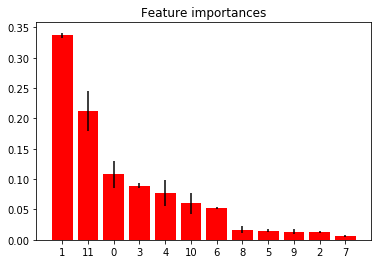

In [0]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
def Feature_importance(train_x, x_test, train_y, y_test):
  forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

  forest.fit(train_x, train_y)
  importances = forest.feature_importances_
  std = np.std([tree.feature_importances_ for tree in forest.estimators_],
              axis=0)
  indices = np.argsort(importances)[::-1]
  print(indices)
  # Print the feature ranking
  print("Feature ranking:")

  for f in range(train_x.shape[1]):
      print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]),features[indices[f]-1])

  # Plot the feature importances of the forest
  plt.figure()
  plt.title("Feature importances")
  plt.bar(range(train_x.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
  plt.xticks(range(train_x.shape[1]), indices)
  plt.xlim([-1, train_x.shape[1]])
  plt.show()

Feature_importance(train_x, x_test, train_y, y_test)

In [0]:
Train2 = df[['distance','typescore', 'buildingType', 'constructionTime','renovationCondition','buildingStructure','Kmeans_feature','elevator','fiveYearsProperty','subway','district','communityAverage']]
Label2 = df['label']

In [0]:
train_x2, x_test2, train_y2, y_test2 = train_test_split(Train2, Label2, test_size=0.3, random_state = 42)

In [0]:
print(Train.shape)

(318390, 12)


In [0]:
accuracy_score1_9, precision_score1_9, recall_score1_9, cross_val_acc_9 = RandomForest(train_x2, x_test2, train_y2, y_test2)
accuracy_score1_10, precision_score1_10, recall_score1_10, cross_val_acc_10 = naive_bayes(train_x2, x_test2, train_y2, y_test2)
accuracy_score1_11, precision_score1_11, recall_score1_11, cross_val_acc_11 = Boosting(train_x2, x_test2, train_y2, y_test2)
accuracy_score1_12, precision_score1_12, recall_score1_12, cross_val_acc_12 = Decision_Tree(train_x2, x_test2, train_y2, y_test2)
accuracy_score1_13, precision_score1_13, recall_score1_13, cross_val_acc_13 = KNN(train_x2, x_test2, train_y2, y_test2)
accuracy_score1_14, precision_score1_14, recall_score1_14, cross_val_acc_14 = Linear_model(train_x2, x_test2, train_y2, y_test2)
accuracy_score1_15, precision_score1_15, recall_score1_15, cross_val_acc_15 = Bagging(train_x2, x_test2, train_y2, y_test2)
accuracy_score1_16, precision_score1_16, recall_score1_16, cross_val_acc_16 = Rule_based(train_x2, x_test2, train_y2, y_test2)

------RandomForest---------Evaluate----------------
cross score is [0.76970703 0.77177083 0.76991071 0.77004532 0.77026966 0.77026966
 0.77300669 0.77251312 0.77148113 0.7706632 ]
accuracy is  0.7712030319210192
precision is 0.7712030319210192
recall is 0.7712030319210192

[[ 5390     0 12426]
 [    3    33  7444]
 [ 1967    14 68240]]
------BAYES---------Evaluate----------------
cross score is [0.72739917 0.72699538 0.72593889 0.72297752 0.72531072 0.72625297
 0.72719523 0.72616323 0.72741957 0.724042  ]
accuracy is  0.7262895610205513
precision is 0.7262895610205513
recall is 0.7262895610205513

[[10546    40  7230]
 [   43  4637  2800]
 [ 8337  7694 54190]]
------Boosting---------Evaluate----------------
cross score is [0.79999103 0.80308672 0.80257549 0.79912056 0.8003769  0.80253062
 0.80446    0.80069099 0.79956926 0.80229741]
accuracy is  0.8028832563836804
precision is 0.8028832563836804
recall is 0.8028832563836804

[[ 8758     1  9057]
 [   10  2982  4488]
 [ 3664  1608 64949

In [0]:
## Import the packages
import numpy as np
import statistics 
## Define 2 random distributions
#Sample Size
N = 10

a1 = cross_val_acc_9
b1 = cross_val_acc_10
c1 = cross_val_acc_11
d1 = cross_val_acc_12
e1 = cross_val_acc_13
f1 = cross_val_acc_14
g1 = cross_val_acc_15
h1 = cross_val_acc_16

v1 = a1 - b1
v2 = a1 - c1
v3 = a1 - d1
v4 = a1 - e1
v5 = a1 - f1
v6 = a1 - g1
v7 = a1 - h1
def pvalue(v):
  mean = np.mean(v)
  s = statistics.stdev(v)
  t_score = mean / (s/np.sqrt(10))
  return t_score

p1 = pvalue(v1)
p2 = pvalue(v2)
p3 = pvalue(v3)
p4 = pvalue(v4)
p5 = pvalue(v5)
p6 = pvalue(v6)
p7 = pvalue(v7)
print(p1,p2,p3,p4,p5,p6,p7)

96.4437940707857 -58.96676798570414 30.47674728595793 -10.92115966456137 -5.740047859566804 -26.893163578298793 543.4984129741083


In [0]:
!pip install chart-studio

In [0]:
!pip install modAL

In [0]:
from modAL.models import ActiveLearner
from modAL.uncertainty import entropy_sampling
from sklearn.ensemble import RandomForestClassifier
def active_learning(train_x2, x_test2, train_y2, y_test2):
    clf = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=entropy_sampling,
    X_training=train_x2, y_training=train_y2
    )
    clf.fit(train_x, train_y)
    prediction = clf.predict(x_test)
    print("------Active learning---------Evaluate----------------")
    recall = recall_score(y_test, prediction,average='micro')
    accuracy = accuracy_score(y_test, prediction)
    cross_val = cross_val_score(clf, train_x, train_y, cv=10,scoring='accuracy')
    precision = precision_score(y_test, prediction,average='micro')
    print('cross score is', cross_val)
    print("accuracy is ", accuracy)
    print("precision is", precision)
    print("recall is", recall)
    print('')
    confusion_matrix1 = confusion_matrix(y_test, prediction, labels=[0, 1, 2])
    print(confusion_matrix1)    
    return accuracy, precision, recall, cross_val
accuracy_score1_17, precision_score1_17, recall_score1_17, cross_val_acc_17 = active_learning(train_x2, x_test2, train_y2, y_test2)

------Active learning---------Evaluate----------------
cross score is [0.7759781  0.77687545 0.78015075 0.77637188 0.77426302 0.77493606
 0.77605779 0.7738592  0.77686544 0.77682057]
accuracy is  0.7758618884596459
precision is 0.7758618884596459
recall is 0.7758618884596459

[[10143    25  7648]
 [   35  3832  3613]
 [ 6915  3173 60133]]


In [0]:
import numpy as np 
import pandas as pd 
from statistics import mean 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 

# split dataset into test set, train set and unlabel pool 
def split(dataset, train_size, test_size): 
  x = df[['distance','typescore', 'buildingType', 'constructionTime','renovationCondition','buildingStructure','Kmeans_feature','elevator','fiveYearsProperty','subway','district','communityAverage']]
  y = df['label']
  x_train, x_pool, y_train, y_pool = train_test_split(x, y, train_size = train_size) 
  unlabel, x_test, label, y_test = train_test_split(x_pool, y_pool, test_size = test_size) 
  return x_train, y_train, x_test, y_test, unlabel, label 


def Activelern(data):
    dataset = data
    imputer = SimpleImputer(missing_values = 0, strategy ="mean")
    imputer = imputer.fit(dataset[:, :-1])
    dataset[:, :-1] = imputer.transform(dataset[:, :-1])
    ac1 = []
    ac2 = []
    for i in range(100):
      # split dataset into train(5 %), test(25 %), unlabel(70 %)
      x_train, y_train, x_test, y_test, unlabel, label = split(dataset, 0.05, 0.25)
		  # train model by active learning 
      for i in range(5):
        classifier1 = LogisticRegression()
        classifier1.fit(x_train,y_train)
        y_probab = classifier1.predict_proba(unlabel)[:,0]
        p = 0.47 # range of uncertanity 0.47 to 0.53 
        uncrt_pt_ind = []
        for i in range(unlabel.shape[0]):
          if(y_probab[i] >=p and y_probab[i]<= 1-p):
            uncrt_pt_ind.append(i)
        x_train = np.append(unlabel.iloc[uncrt_pt_ind, :], x_train, axis = 0)
        y_train = np.append(label[uncrt_pt_ind], y_train)
      print(np.shape(x_train))
      classifier2 = LogisticRegression()
      classifier2.fit(x_train, y_train)
      ac1.append(classifier2.score(x_test, y_test))
      train_size = x_train.shape[0]/dataset.shape[0]
      x_train, y_train, x_test, y_test, unlabel, label = split(dataset, train_size, 0.25)
		  # train model without active learning
      classifier3 = LogisticRegression()
      classifier3.fit(x_train, y_train)
      ac2.append(classifier3.score(x_test,y_test))
    print("Accuracy by active model :", mean(ac1)*100)
    print("Accuracy by random sampling :", mean(ac2)*100)

Activelern(df)



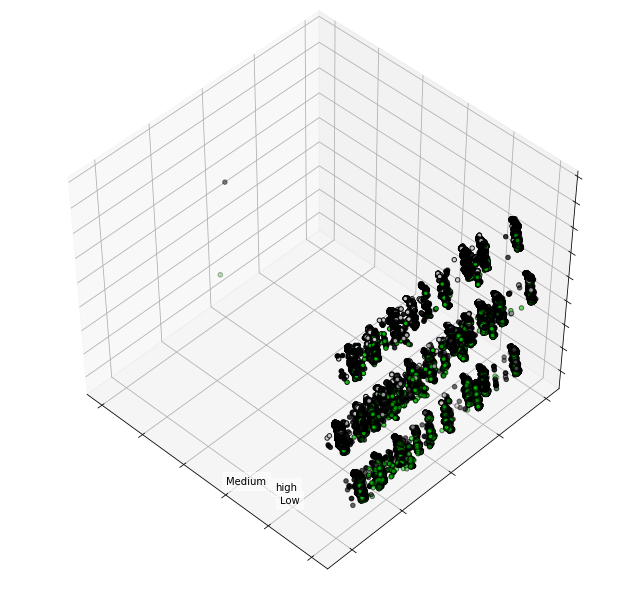

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
X = Train
y = Label

fig = plt.figure(1, figsize=(9, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=4)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Low', 0), ('Medium', 1), ('high', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [0]:
train_x1, x_test1, train_y1, y_test1 = train_test_split(X, y, test_size=0.3, random_state = 42)

In [0]:
accuracy_score1_1, precision_score1_1, recall_score1_1, cross_val_acc_1 = Boosting(train_x1, x_test1, train_y1, y_test1)
accuracy_score1_2, precision_score1_2, recall_score1_2, cross_val_acc_2 = Decision_Tree(train_x1, x_test1, train_y1, y_test1)
accuracy_score1_3, precision_score1_3, recall_score1_3, cross_val_acc_3 = KNN(train_x1, x_test1, train_y1, y_test1)
accuracy_score1_4, precision_score1_4, recall_score1_4, cross_val_acc_4 = Linear_model(train_x1, x_test1, train_y1, y_test1)
accuracy_score1_5, precision_score1_5, recall_score1_5, cross_val_acc_5 = Rule_based(train_x1, x_test1, train_y1, y_test1)

------Boosting---------Evaluate----------------
cross score is [0.74696038 0.74709498 0.74693768 0.74680307 0.74805941 0.74666846
 0.74657872 0.74814915 0.74491856 0.74459302]
accuracy is  0.7458148811206382
precision is 0.7458148811206382
recall is 0.7458148811206382

[[68381  1071   769]
 [16210  1601     5]
 [ 6221     3  1256]]
------TREE---------Evaluate----------------
cross score is [0.73457759 0.74027547 0.73764975 0.73563064 0.73572038 0.73913043
 0.73370126 0.74029703 0.74047651 0.74001615]
accuracy is  0.7397426636096193
precision is 0.7397426636096193
recall is 0.7397426636096193

[[58708  7916  3597]
 [ 9053  8648   115]
 [ 4070   108  3302]]
------KNN---------Evaluate----------------
cross score is [0.76737404 0.76486159 0.7591421  0.75918697 0.76134069 0.76178938
 0.76277651 0.76703908 0.7643918  0.76509917]
accuracy is  0.7672456211983207
precision is 0.7672456211983207
recall is 0.7672456211983207

[[61174  6347  2700]
 [ 9078  8701    37]
 [ 4022    48  3410]]
------L

In [0]:
features = Train.columns.values.tolist()